In [1]:
#Activation of the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import openseespy.opensees as ops
import opsvis as opsv
import time

CTestEnergyIncr::test() - iteration: 1 current EnergyIncr: 0.00359812 (max: 1e-06)
	Norm deltaX: 0.0121948, Norm R: 1.93
	deltaX: 0.0101825 -0.00671044 
	deltaR: -0.518427 -1.85906 
CTestEnergyIncr::test() - iteration: 2 current EnergyIncr: 3.11178e-05 (max: 1e-06)
	Norm deltaX: 0.00102894, Norm R: 0.153248
	deltaX: -0.000684077 -0.000768607 
	deltaR: 0.145394 -0.0484316 
CTestEnergyIncr::test() - iteration: 3 current EnergyIncr: 3.57317e-07 (max: 1e-06)
	Norm deltaX: 0.00011268, Norm R: 0.0168448
	deltaX: 0.000109524 -2.64839e-05 
	deltaR: -0.0098323 -0.0136775 

CTestEnergyIncr::test() - iteration: 1 current EnergyIncr: 0.000500077 (max: 1e-06)
	Norm deltaX: 0.0130232, Norm R: 3.95396
	deltaX: 0.0121229 -0.00475791 
	deltaR: -1.51576 -3.65188 
CTestEnergyIncr::test() - iteration: 2 current EnergyIncr: 0.000485468 (max: 1e-06)
	Norm deltaX: 0.00205901, Norm R: 0.581768
	deltaX: -0.0016532 -0.00122738 
	deltaR: 0.581719 0.00752857 
CTestEnergyIncr::test() - iteration: 3 current EnergyI

[[ 0.00000000e+00  0.00000000e+00]
 [-7.30640890e-02  7.60450816e+01]
 [-1.25089934e-01  1.35551951e+02]
 [-1.54464703e-01  1.80108512e+02]
 [-1.60805338e-01  2.16590813e+02]
 [-1.44181799e-01  2.55483126e+02]
 [-1.04557295e-01  3.06248755e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3.73219212e+02]
 [-4.28359851e-02  3

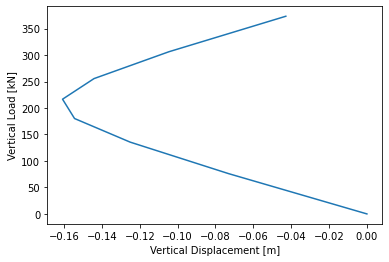

Running Time:  2.3317668437957764  seconds


In [2]:
# Define the model
ops.wipe()
start = time.time()
### model('basic', '-ndm', ndm, '-ndf', ndf=ndm*(ndm+1)/2)
ops.model('basic', '-ndm', 2, '-ndf', 2)


ArcLengthAlpha = 0.28 #Initial value of alpha (arc length parameter)
ArcLengthLambda = 0.04  #Initial value of lambda (arc length parameter)
spring_stiffness = 208.609


#Geometric and material properties
E1 = 50000  # Modulus of elasticity in kN/m^2
A1 = 0.01  # Area of the section in m^2
E2 = 300000  # Modulus of elasticity in kN/m^2
A2 = 0.01 # Area of the section in m^2

# Load parameters
Px = 0
Py = 30 #kN

#Coordinates of the nodes
Lhalf = 2.1
L = 2*Lhalf
### node(nodeTag, *crds, '-ndf', ndf, '-mass', *mass, '-disp', *disp, '-vel', *vel, '-accel', *accel)
ops.node(1, 0.0, 0.0)
ops.node(2, Lhalf, 1.0) 
ops.node(3, Lhalf, 1.0)
ops.node(4, L, 0.0)


# Define boundary conditions (first and third nodes are free restrained)
### fix(nodeTag, *constrValues)
ops.fix(1, 1, 1)
ops.fix(3, 1, 1)
ops.fix(4, 1, 1)

# Define material
### uniaxialMaterial(matType, matTag, *matArgs)
ops.uniaxialMaterial('Elastic', 1, E1)
ops.uniaxialMaterial('Elastic', 2, E2)

# Spring stiffness in kN/m
 
ops.uniaxialMaterial('Elastic', 3, spring_stiffness)

# Define elements using corotTruss element (accounts for geometric nonlinearity)
### element(eleType, eleTag, *eleNodes, *eleArgs)
ops.element('corotTruss', 1, 1, 2, A1, 1)
ops.element('corotTruss', 2, 2, 4, A2, 2)
ops.element('zeroLength', 3, 3, 2, '-mat', 3, '-dir', 2)

# Define load at the middle node
### timeSeries(tsType, tsTag, *tsArgs)
ops.timeSeries('Linear', 1)
### pattern(patternType, patternTag, *patternArgs)
ops.pattern('Plain', 1, 1)

#Load
###load(nodeTag, *loadValues)
ops.load(2, 0, -Py)

# create SOE - System Of Equation
### system(systemType, *systemArgs)
ops.system('ProfileSPD')

# create DOF number
### numberer(numbererType, *numbererArgs)
ops.numberer('RCM')

# create constraint handler
### constraints(constraintType, *constraintArgs)
ops.constraints('Plain')

# create integrator
Nsteps=50 #Number of increments

ops.integrator('ArcLength', ArcLengthAlpha, ArcLengthLambda) 

# create algorithm
### algorithm(algoType, *algoArgs)
ops.algorithm('ModifiedNewton', '-initial') #MODIFIED NEWTON-RAPHSON!

# create test
### test(testType, *testArgs)
ops.test('EnergyIncr', 1.0e-6, 30, 4)

# create analysis object
### analysis(analysisType)
ops.analysis("Static")

#PERFORM ANALYSIS
data = np.zeros((Nsteps+1,2)) 
for j in range(Nsteps):
    ### analyze(numIncr=1, dt=0.0, dtMin=0.0, dtMax=0.0, Jd=0)
    ops.analyze(1) 
    data[j+1,0] = ops.nodeDisp(2,1)    #abs(ops.nodeDisp(2,2)) 
    data[j+1,1] = ops.getLoadFactor(1)*Py 
print(data)
results = pd.DataFrame(data, columns=['Displacement','Force'])
results.to_excel('Results - Arclength Method - RIKS AND WAMPNER.xlsx')

plt.plot(data[:,0], data[:,1])
plt.xlabel('Vertical Displacement [m]')
#plt.ylim(-30, 100)
plt.ylabel('Vertical Load [kN]')
plt.show()

end = time.time()
running_time = (end - start)
print('Running Time: ', running_time, ' seconds')